In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../Data/cleaned/nomad_cities.csv')

In [4]:
data.head()

,coffee_in_cafe,cost_beer,cost_coworking,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,life_score,longitude,nightlife,nomad_score,place,places_to_work,racism,safety
0,1.73,1.73,152.41,1364,1.0,52.7,0.4,0.6,0.6,31,47.497912,0.86,19.040235,1.0,1.00,Budapest,1.0,0.40,0.60
1,0.85,0.85,98.88,777,0.8,78.8,0.6,0.2,0.6,14,18.787747,0.75,98.993128,0.4,0.95,Chiang Mai,0.8,0.40,0.80
2,1.99,1.99,159.13,1639,1.0,40.8,0.6,0.8,0.8,15,50.075538,0.83,14.437800,1.0,0.94,Prague,1.0,0.42,0.80
3,1.88,1.88,47.01,1545,1.0,74.6,1.0,0.6,0.8,16,25.091075,0.93,121.559834,0.6,0.94,Taipei,1.0,0.00,1.00
4,5.00,5.00,200.00,3028,0.8,34.0,0.6,0.6,0.8,118,30.267153,0.95,-97.743061,1.0,0.94,Austin,1.0,0.80,0.73


In [5]:
data.isna().sum()

coffee_in_cafe            0
cost_beer                 0
cost_coworking            0
cost_nomad                0
female_friendly           0
fragile_states_index      0
free_wifi_available       0
freedom_score             0
friendly_to_foreigners    0
internet_speed            0
latitude                  0
life_score                0
longitude                 0
nightlife                 0
nomad_score               0
place                     0
places_to_work            0
racism                    0
safety                    0
dtype: int64

In [6]:
def numerical_categorical_split(df):
    numerical = df.select_dtypes(include='number').columns
    categorical = df.select_dtypes(include='object').columns
    
    numerical_df = df[numerical]
    categorical_df = df[categorical]
    
    return numerical_df, categorical_df

    numerical_df, categorical_df = numerical_categorical_split(df)

In [7]:
numerical_df, categorical_df = numerical_categorical_split(data)

In [8]:
numerical_df.describe()

,coffee_in_cafe,cost_beer,cost_coworking,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,life_score,longitude,nightlife,nomad_score,places_to_work,racism,safety
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,7.810000e+02,781.000000
mean,3.296056,3.296056,210.360077,2332.348271,0.645391,55.965045,0.561191,0.480397,0.736671,13.588988,29.520930,0.700397,14.851463,0.605224,0.649142,0.571421,2.328018e+25,0.678399
std,1.981795,1.981795,173.978777,1117.532001,0.247435,23.363853,0.239538,0.245954,0.183893,18.199150,22.173898,0.147803,77.089023,0.234124,0.134709,0.220156,6.505966e+26,0.210111
min,0.000000,0.000000,0.010000,387.000000,0.000000,18.800000,0.000000,0.200000,0.000000,0.000000,-45.878760,0.010000,-157.858333,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.600000,1.600000,88.960000,1486.000000,0.440000,34.000000,0.400000,0.200000,0.600000,2.000000,19.990908,0.620000,-63.000000,0.400000,0.550000,0.400000,4.000000e-01,0.600000
50%,3.030000,3.030000,172.050000,2209.000000,0.600000,55.900000,0.600000,0.600000,0.800000,6.000000,35.513830,0.720000,14.790612,0.600000,0.680000,0.400000,6.000000e-01,0.600000
75%,4.620000,4.620000,277.350000,3056.000000,0.800000,74.900000,0.800000,0.600000,0.800000,19.000000,44.933333,0.810000,77.594563,0.800000,0.740000,0.800000,8.000000e-01,0.800000
max,13.720000,13.720000,1524.460000,10121.000000,1.000000,111.500000,1.000000,1.000000,1.000000,197.000000,69.649205,1.000000,174.776236,1.000000,1.000000,1.000000,1.818182e+28,1.000000


In [9]:
categorical_df

,place
0,Budapest
1,Chiang Mai
2,Prague
3,Taipei
4,Austin
...,...
776,Bahawalpur
777,Baghdad
778,Cali
779,Pyongyang


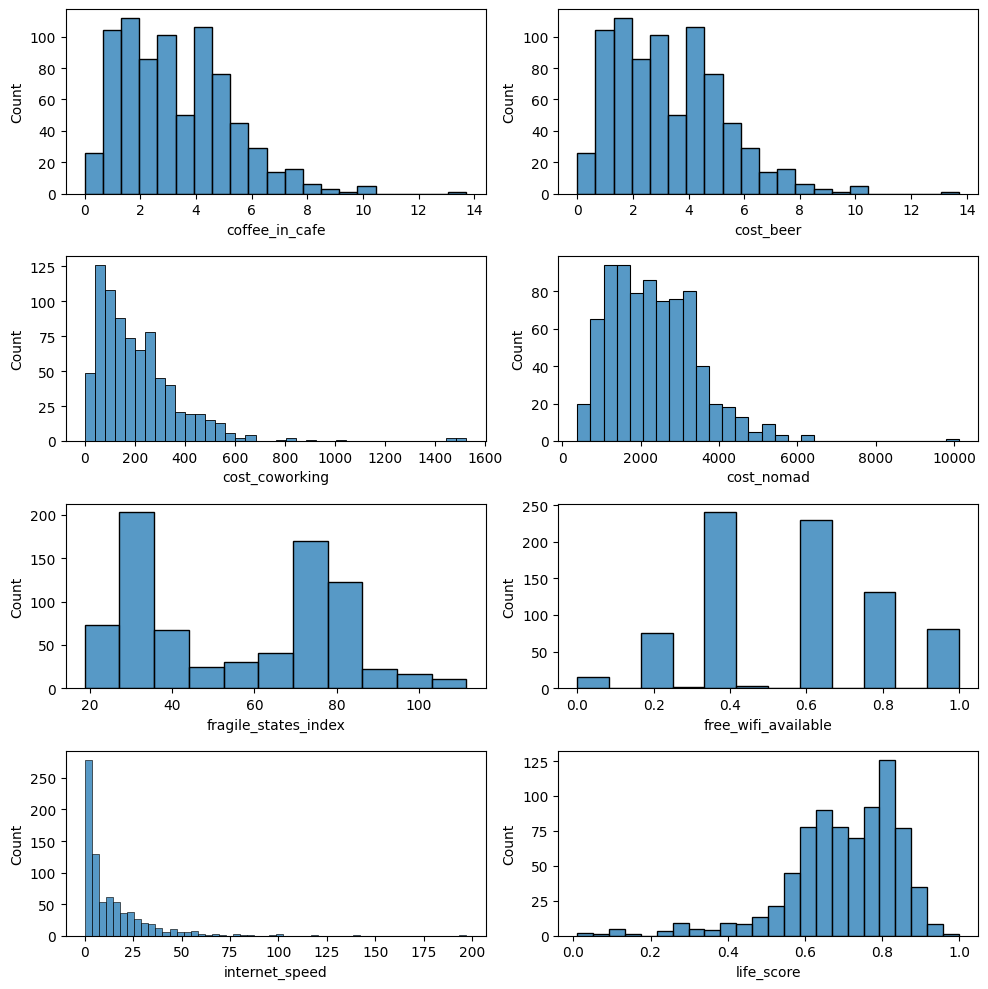

In [10]:
fig, ax = plt.subplots(4,2,figsize=(10,10))
sns.histplot(data=numerical_df, x="coffee_in_cafe", ax = ax[0,0])
sns.histplot(data=numerical_df,x="cost_beer", ax = ax[0,1])
sns.histplot(data=numerical_df,x="cost_coworking", ax = ax[1,0])
sns.histplot(data=numerical_df, x="cost_nomad", ax = ax[1,1])
sns.histplot(data=numerical_df, x="fragile_states_index", ax = ax[2,0])
sns.histplot(data=numerical_df,x="free_wifi_available", ax = ax[2,1])
sns.histplot(data=numerical_df, x="internet_speed", ax = ax[3,0])
sns.histplot(data=numerical_df, x="life_score", ax = ax[3,1])
plt.tight_layout()
plt.show() 

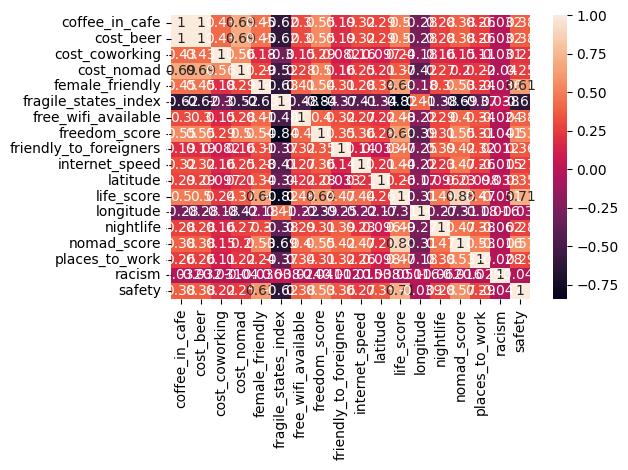

In [11]:
correlations_matrix = numerical_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.tight_layout()
plt.show()

In [12]:
categorical_df["place_number"] = range(1, len(categorical_df)+1)
categorical_df

C:\Users\celia\AppData\Local\Temp\ipykernel_21440\1094755383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df["place_number"] = range(1, len(categorical_df)+1)


,place,place_number
0,Budapest,1
1,Chiang Mai,2
2,Prague,3
3,Taipei,4
4,Austin,5
...,...,...
776,Bahawalpur,777
777,Baghdad,778
778,Cali,779
779,Pyongyang,780


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = numerical_df
y = categorical_df.drop('place', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer() 
transformer.fit(X_train)

X_train_tranformer = transformer.transform(X_train)
X_test_tranformer  = transformer.transform(X_test)

X_train_transformed_df = pd.DataFrame(X_train_tranformer, columns = X_train.columns)
X_test_transformed_df  = pd.DataFrame(X_test_tranformer, columns = X_test.columns)
display(X_train_transformed_df.head())
display(X_test_transformed_df.head())

,coffee_in_cafe,cost_beer,cost_coworking,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,life_score,longitude,nightlife,nomad_score,places_to_work,racism,safety
0,-1.683307,-1.683307,-0.708218,-1.121991,-0.271895,0.524818,-0.680095,-1.20486,-0.808781,-0.529346,-1.302841,-0.704885,1.133264,-1.796800,-1.040737,0.232861,-1.739323,-0.446642
1,-0.243024,-0.243024,0.965420,0.579760,-0.271895,-0.029427,0.158258,0.21109,-0.808781,0.958611,-0.513240,0.765344,1.321906,-0.038337,0.938031,-0.756371,-1.739323,-0.446642
2,-0.231822,-0.231822,-1.837391,1.107152,-0.271895,-0.054935,-0.680095,-1.20486,-0.808781,-0.074813,-0.442471,0.197497,0.530739,-0.909340,0.198174,0.232861,-1.739323,0.528473
3,0.887826,0.887826,-0.174464,0.516138,0.559133,-0.883546,-2.431485,0.51083,0.277367,1.284270,0.271793,1.307544,-1.162958,-0.821543,1.350578,1.052153,0.847408,0.528473
4,-0.873791,-0.873791,1.481476,-1.061259,-0.271895,0.845559,-0.680095,-1.20486,-1.747269,0.759160,0.269690,-0.573842,1.387089,-0.909340,0.029939,-0.756371,-1.150238,-0.446642


,coffee_in_cafe,cost_beer,cost_coworking,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,life_score,longitude,nightlife,nomad_score,places_to_work,racism,safety
0,0.329056,0.329056,1.374634,1.201607,0.559133,-0.826214,0.976749,0.51083,0.277367,-0.529346,0.283620,0.765344,-1.381348,0.818528,-0.916160,1.052153,1.845427e-01,1.599753
1,0.061117,0.061117,-0.937355,-1.175508,-0.271895,0.845559,-0.680095,-1.20486,-0.808781,-0.349193,-0.367994,-0.704885,1.163778,-1.796800,-0.851892,-0.756371,-5.076696e-01,-0.446642
2,-0.909060,-0.909060,-1.106604,-1.264946,-1.009125,1.056816,-0.680095,-1.20486,0.277367,-0.074813,1.217065,-1.441799,0.413558,-1.796800,-0.581163,-0.756371,1.621886e+43,-1.323822
3,-1.217679,-1.217679,-0.731414,-1.158019,-0.271895,1.009063,-1.541761,-1.20486,-0.808781,-0.759493,-0.459275,-0.946236,0.801815,-1.796800,-1.101083,-0.756371,-1.150238e+00,-1.323822
4,-0.671291,-0.671291,0.451904,-1.006099,-0.271895,0.684075,-0.680095,-1.20486,-0.808781,-0.200927,-0.657481,-0.704885,-1.406275,-0.038337,-0.210560,-0.756371,1.845427e-01,-1.323822


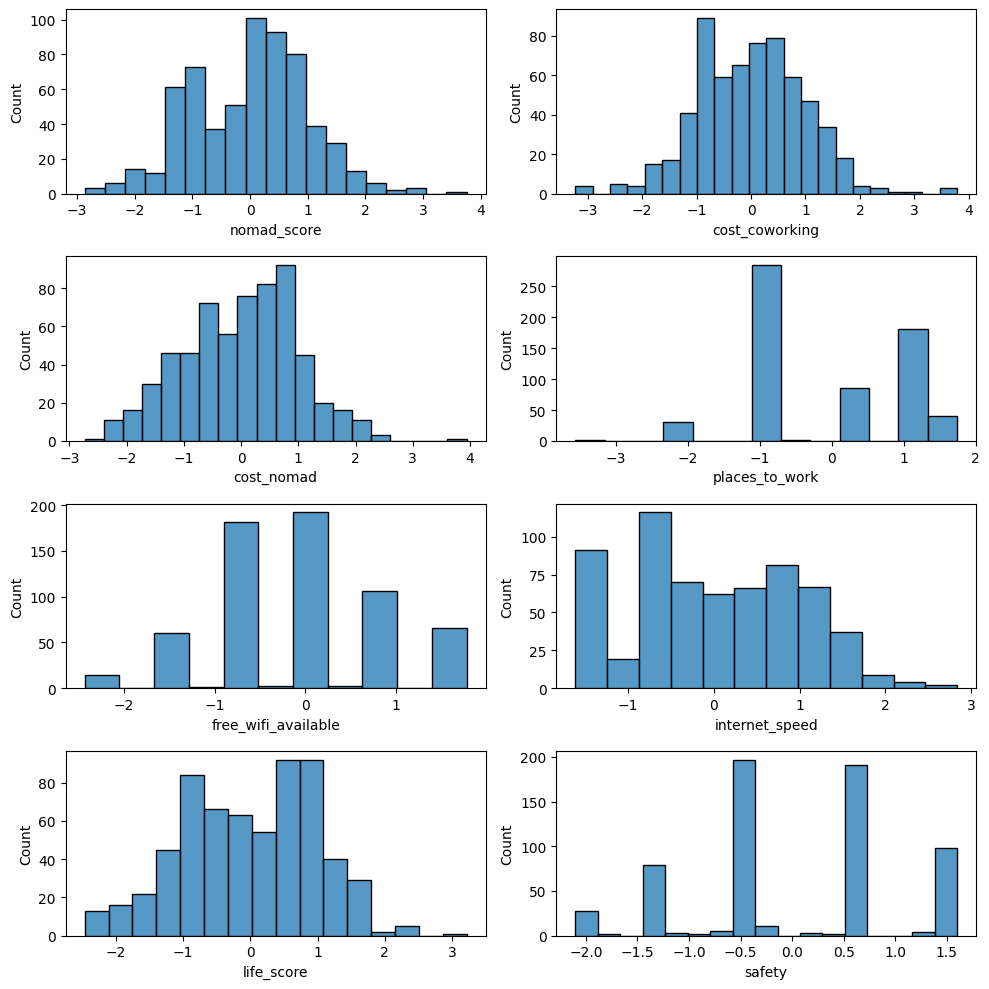

In [17]:
fig, ax = plt.subplots(4,2,figsize=(10,10))
sns.histplot(data=X_train_transformed_df, x="nomad_score", ax = ax[0,0])
sns.histplot(data=X_train_transformed_df,x="cost_coworking", ax = ax[0,1])
sns.histplot(data=X_train_transformed_df,x="cost_nomad", ax = ax[1,0])
sns.histplot(data=X_train_transformed_df, x="places_to_work", ax = ax[1,1])
sns.histplot(data=X_train_transformed_df, x="free_wifi_available", ax = ax[2,0])
sns.histplot(data=X_train_transformed_df,x="internet_speed", ax = ax[2,1])
sns.histplot(data=X_train_transformed_df, x="life_score", ax = ax[3,0])
sns.histplot(data=X_train_transformed_df, x="safety", ax = ax[3,1])
plt.tight_layout()
plt.show() 

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_transformed_df)
X_train_scaled = scaler.transform(X_train_transformed_df)
X_test_scaled = scaler.transform(X_test_transformed_df)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = X_train_transformed_df.columns.tolist())
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = X_test_transformed_df.columns.tolist())

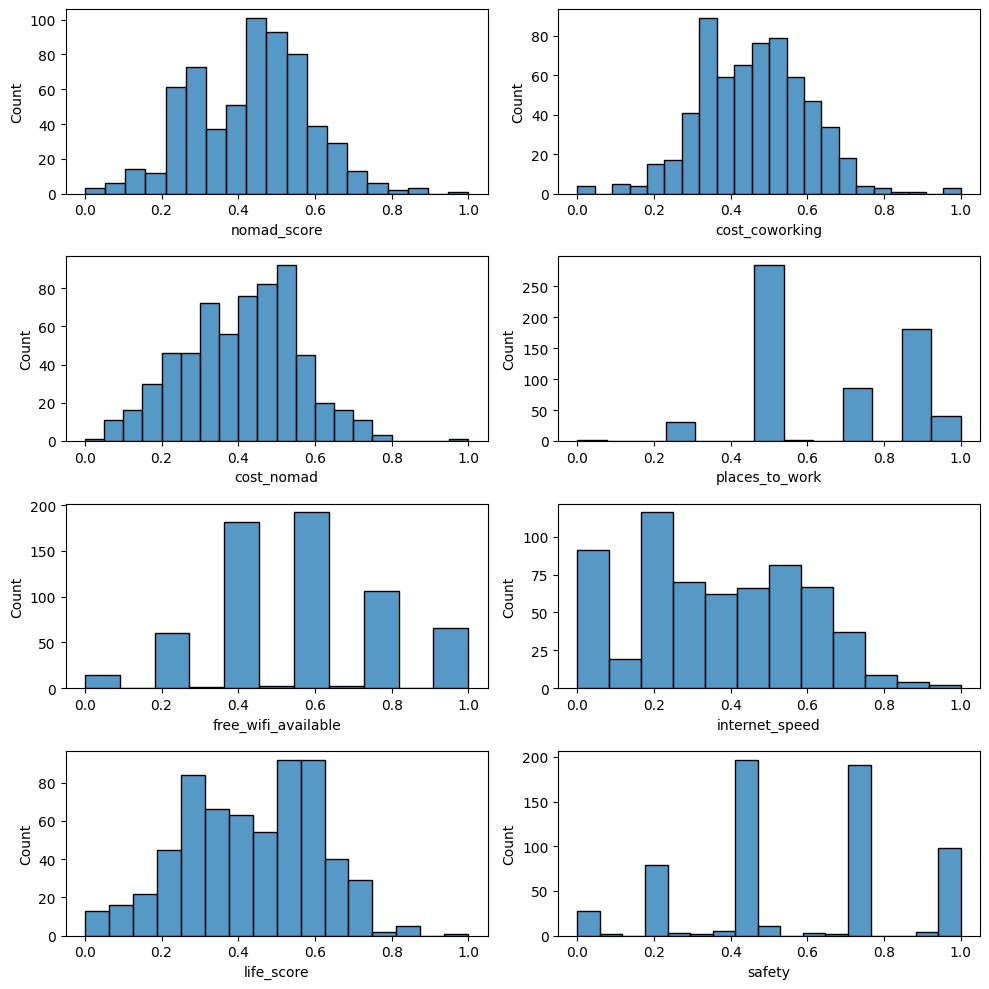

In [19]:
fig, ax = plt.subplots(4,2,figsize=(10,10))
sns.histplot(data=X_train_scaled_df, x="nomad_score", ax = ax[0,0])
sns.histplot(data=X_train_scaled_df,x="cost_coworking", ax = ax[0,1])
sns.histplot(data=X_train_scaled_df,x="cost_nomad", ax = ax[1,0])
sns.histplot(data=X_train_scaled_df, x="places_to_work", ax = ax[1,1])
sns.histplot(data=X_train_scaled_df, x="free_wifi_available", ax = ax[2,0])
sns.histplot(data=X_train_scaled_df,x="internet_speed", ax = ax[2,1])
sns.histplot(data=X_train_scaled_df, x="life_score", ax = ax[3,0])
sns.histplot(data=X_train_scaled_df, x="safety", ax = ax[3,1])
plt.tight_layout()
plt.show()

In [20]:
data.columns

Index(['coffee_in_cafe', 'cost_beer', 'cost_coworking', 'cost_nomad',
       'female_friendly', 'fragile_states_index', 'free_wifi_available',
       'freedom_score', 'friendly_to_foreigners', 'internet_speed', 'latitude',
       'life_score', 'longitude', 'nightlife', 'nomad_score', 'place',
       'places_to_work', 'racism', 'safety'],
      dtype='object')

In [21]:
data['total_score'] = data['nomad_score']+data['safety']+data['friendly_to_foreigners']

In [22]:
data['cost_nomad']

0       1364
1        777
2       1639
3       1545
4       3028
       ...  
776     2637
777     2980
778     1099
779     5009
780    10121
Name: cost_nomad, Length: 781, dtype: int64

In [23]:
data.groupby('place').mean()['total_score']

place
A Coruna     2.33
Aachen       2.29
Aalborg      2.44
Aalesund     2.52
Aarhus       2.47
             ... 
Zhongshan    1.70
Zhoukou      2.05
Zhuhai       1.51
Zibo         1.67
Zurich       2.54
Name: total_score, Length: 781, dtype: float64

In [24]:
best_total_score = data.sort_values('total_score', ascending=False)

In [25]:
best_total_score.head(5)

,coffee_in_cafe,cost_beer,cost_coworking,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,life_score,longitude,nightlife,nomad_score,place,places_to_work,racism,safety,total_score
27,3.55,3.55,319.73,2172,0.0,21.3,0.6,0.8,1.0,32,-43.532054,0.88,172.636225,0.6,0.84,Christchurch,0.8,1.0,1.0,2.84
28,4.30,4.30,172.05,2236,1.0,28.6,1.0,0.8,1.0,40,52.520007,0.88,13.404954,1.0,0.84,Berlin,0.8,1.0,1.0,2.84
34,3.02,3.02,332.05,1938,1.0,22.5,0.6,0.8,1.0,5,-31.953513,0.88,115.857047,0.6,0.83,Perth,0.8,0.8,1.0,2.83
48,5.38,5.38,298.94,3129,1.0,28.2,0.8,1.0,1.0,37,52.090737,0.90,5.121420,0.8,0.82,Utrecht,0.8,0.8,1.0,2.82
45,4.30,4.30,257.00,2501,1.0,28.6,0.6,0.8,1.0,25,48.775846,0.89,9.182932,0.8,0.82,Stuttgart,0.8,0.8,1.0,2.82


In [26]:
final_ranking = best_total_score.sort_values('cost_nomad', ascending=True)

In [27]:
final_ranking.head(10)

,coffee_in_cafe,cost_beer,cost_coworking,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,life_score,longitude,nightlife,nomad_score,place,places_to_work,racism,safety,total_score
410,0.73,0.73,59.25,387,0.8,74.9,0.4,0.2,0.4,13,32.996968,0.63,112.273391,0.6,0.67,Nanyang,0.6,0.4,0.80,1.87
458,1.09,1.09,88.96,519,0.8,74.9,0.4,0.2,0.6,0,33.633300,0.65,114.633300,0.6,0.65,Zhoukou,0.4,0.4,0.80,2.05
621,0.09,0.09,7.21,522,0.6,79.6,0.2,0.2,0.8,2,23.022505,0.64,72.571362,0.4,0.53,Ahmedabad,0.4,0.2,0.60,1.93
264,0.78,0.78,62.01,543,0.2,75.5,0.6,0.4,1.0,13,49.839683,0.62,24.029717,0.4,0.72,Lviv,0.8,0.4,0.40,2.12
683,0.93,0.93,0.83,564,0.6,91.2,0.4,0.4,1.0,0,27.717200,0.52,85.324000,0.4,0.49,Kathmandu,0.4,0.0,0.42,1.91
666,0.00,0.00,5.61,565,0.4,74.9,0.6,0.2,0.6,4,-7.559203,0.56,110.748772,0.2,0.50,Surakarta,0.2,0.8,0.40,1.50
678,0.00,0.00,5.61,566,0.4,74.9,0.4,0.2,0.6,2,-7.024770,0.56,110.348808,0.2,0.49,Semarang,0.2,0.8,0.40,1.49
676,0.44,0.44,51.68,582,0.2,79.6,0.2,0.2,0.6,4,9.931233,0.54,76.267304,0.6,0.50,Kochi,0.2,0.2,0.40,1.50
656,0.73,0.73,59.25,584,0.8,74.9,0.8,0.2,0.4,3,28.683300,0.61,115.883300,0.6,0.51,Nanchang,0.4,0.4,0.80,1.71
347,0.75,0.75,5.61,593,0.4,74.9,0.4,0.2,0.6,5,-5.122757,0.62,119.391229,0.6,0.69,Makassar,0.6,0.4,0.40,1.69


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
X = data[['cost_beer', 'cost_coworking', 'freedom_score', 'internet_speed', 'nightlife', 'places_to_work']]
y = data['cost_nomad']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Mean squared error: 401043.11
Coefficient of determination: 0.62


In [35]:
data["cost_nomad"].mean()

2332.348271446863

In [37]:
cost_safety = data[["place", "cost_nomad", "safety"]]
cost_safety = cost_safety[(cost_safety["cost_nomad"] < 2332) & (cost_safety["safety"] > 0.5)]
cost_safety = cost_safety.sort_values(by=["cost_nomad"])
cost_safety


,place,cost_nomad,safety
410,Nanyang,387,0.8
458,Zhoukou,519,0.8
621,Ahmedabad,522,0.6
656,Nanchang,584,0.8
663,Shantou,623,0.8
...,...,...,...
62,Valencia,2287,0.8
353,St.Catharines,2298,1.0
559,Abidjan,2299,0.6
37,Seville,2307,1.0


In [41]:
data2 = pd.read_excel("../Data/cleaned/ms-excel-file-2.xlsx")
dive_centers = data2[data2["dive_shop"].notnull()]
dive_centers = dive_centers.sort_values(by=["municipality", "location"])
dive_centers


,dive_shop,municipality,location,coral_species,observation,latitude,longitude
177,Technical Diving,Aguadilla,Bahia Aguadilla,Dendrogyra cylindricus,disease,18.430682,-67.157559
138,La casa del Buzo,Aguadilla,Crash Boat,Montastraea annularis,bleaching,18.457271,-67.165264
139,La casa del Buzo,Aguadilla,Crash Boat,Agaricia lamarki,bleaching,18.457271,-67.165264
140,La casa del Buzo,Aguadilla,Crash Boat,Dendrogyra cylindricus,bleaching,18.457271,-67.165264
159,Technical Diving,Aguadilla,Crash Boat,Acropora palmata,unknown,18.456975,-67.165471
...,...,...,...,...,...,...,...
311,La Casa del Mar,Vieques,West of Punta Arenas,Montastraea faveolata,very good condition but few fish,18.093780,-65.588804
331,Hector Angueira,Vieques,West of Punta Arenas,Montastraea annularis,good condition,18.097979,-65.584498
333,Hector Angueira,Vieques,West of Punta Arenas,Montastraea faveolata,much better health than other areas,18.097979,-65.584498
338,Hector Angueira,Vieques,West of Punta Arenas,Montastraea franksi,very good condition,18.097979,-65.584498


In [42]:
data3 = pd.read_csv("../Data/cleaned/points_data.csv.csv")
marine_species = data3[data3["presence"] == "present"]
marine_species = marine_species[["latitude", "longitude", "sci_name"]]

marine_species = marine_species.groupby(["latitude", "longitude"]).agg({"sci_name": pd.Series.nunique})

marine_species

FileNotFoundError: [Errno 2] No such file or directory: '../Data/cleaned/points_data.csv.csv'